In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("../dbcan/results/overview_derep.txt", sep="\t")
df["Plasmid"] = df["Gene ID"].apply(
    lambda x: "_".join(x.split("_")[0:-1]) if "IMGPR" not in x else x.split("|")[0]
)
df["taxon_oid"] = df["Plasmid"].apply(
    lambda x: x.split("|")[0] if "IMGPR" not in x else x.split("_")[2]
)
df.head()

,Gene ID,EC#,HMMER,dbCAN_sub,DIAMOND,#ofTools,Plasmid,taxon_oid
0,2140918002|contig03832_5,-,GH184(72-218),-,-,1,2140918002|contig03832,2140918002
1,2162886007|SwRhRL2b_contig_1567849_80,-,PL17_1(378-509),PL17_e0,PL17_1,3,2162886007|SwRhRL2b_contig_1567849,2162886007
2,2162886007|SwRhRL2b_contig_2777551_6,3.2.1.20:1,GH13_23(29-376),GH13_e140,GH13_23,3,2162886007|SwRhRL2b_contig_2777551,2162886007
3,2162886007|SwRhRL2b_contig_988462_11,-,GH23(68-171),GH23_e697,GH23,3,2162886007|SwRhRL2b_contig_988462,2162886007
4,2162886008|PRSSGFe2_Sequence0000004305_6,-,GH184(66-202),-,GH184,2,2162886008|PRSSGFe2_Sequence0000004305,2162886008


In [3]:
df_substrate = pd.read_csv("../dbcan/results/substrate_derep.out", sep="\t")
df_substrate["Plasmid"] = df_substrate["#cgcid"].apply(
    lambda x: "|".join(x.split("|")[0:-1])
)
df_substrate["cgc_id"] = df_substrate["#cgcid"].apply(lambda x: x.split("|")[-1])
df_substrate.head()

,#cgcid,PULID,dbCAN-PUL substrate,bitscore,signature pairs,dbCAN-sub,substrate,dbCAN-sub.1,substrate score,Plasmid,cgc_id
0,PLSDB_NZ_CP079881.1|CGC1,PUL0575,raffinose,7569.1,CAZyme-CAZyme;CAZyme-CAZyme;CAZyme-CAZyme;TC-T...,sucrose,2.0,PLSDB_NZ_CP079881.1,CGC1,PLSDB_NZ_CP079881.1,CGC1
1,3300049581|Ga0501047_0000730|CGC1,NaN,NaN,NaN,NaN,lignin,2.0,3300049581|Ga0501047_0000730,CGC1,3300049581|Ga0501047_0000730,CGC1
2,IMGPR_plasmid_2860691947_000002|2860691947|286...,NaN,NaN,NaN,NaN,"xylan,xyloglucan",4.0,IMGPR_plasmid_2860691947_000002|2860691947|286...,CGC1,IMGPR_plasmid_2860691947_000002|2860691947|286...,CGC1
3,Refsoil_NC_020560.1|CGC9,PUL0505,capsule polysaccharide synthesis,433.3,CAZyme-CAZyme;CAZyme-CAZyme;CAZyme-CAZyme;CAZy...,NaN,NaN,Refsoil_NC_020560.1,CGC9,Refsoil_NC_020560.1,CGC9
4,Refsoil_NC_021908.1|CGC3,PUL0575,raffinose,1093.0,CAZyme-CAZyme;CAZyme-CAZyme;TC-TC;TC-TC;TC-TC;...,NaN,NaN,Refsoil_NC_021908.1,CGC3,Refsoil_NC_021908.1,CGC3


In [4]:
df_hosts = pd.read_csv(
    "../crispr_search/plasmid_host_taxonomy_consolidated_all_possible_hosts_final.tsv",
    sep="\t",
    index_col=0,
)

# separate host into different columns
taxonomies = ["domain", "phylum", "class", "order", "family", "genus", "species"]
for i, tax in enumerate(taxonomies):
    df_hosts[tax] = df_hosts["host"].apply(
        lambda x: x.split(";")[i] if len(x.split(";")) > i else np.nan
    )

df_hosts.head()

,PTU,host,method,domain,phylum,class,order,family,genus,species
Plasmid,,,,,,,,,,
3300056587|Ga0562382_00532,PTU-00000,d__Bacteria;p__Acidobacteriota;c__Terriglobia;...,iphop-blast,d__Bacteria,p__Acidobacteriota,c__Terriglobia,o__Terriglobales,f__SbA1,g__JAIQEY01,s__JAIQEY01 sp020073565
3300056587|Ga0562382_00532,PTU-00000,d__Bacteria;p__Acidobacteriota;c__Terriglobia;...,iphop-blast,d__Bacteria,p__Acidobacteriota,c__Terriglobia,o__Terriglobales,f__SbA1,g__PALSA-188,s__PALSA-188 sp003169715
3300056587|Ga0562382_00532,PTU-00000,d__Bacteria;p__Acidobacteriota;c__Terriglobia;...,iphop-blast,d__Bacteria,p__Acidobacteriota,c__Terriglobia,o__Terriglobales,f__SbA1,g__PALSA-188,NaN
3300056587|Ga0562382_00532,PTU-00000,d__Bacteria;p__Acidobacteriota;c__Terriglobia;...,iphop-blast,d__Bacteria,p__Acidobacteriota,c__Terriglobia,o__Terriglobales,f__SbA1,g__Bog-209,s__Bog-209 sp003132405
3300041809|Ga0455670_0001447,PTU-00000,d__Bacteria;p__Acidobacteriota;c__Terriglobia;...,iphop-blast,d__Bacteria,p__Acidobacteriota,c__Terriglobia,o__Terriglobales,f__SbA1,g__Sulfotelmatobacter,s__Sulfotelmatobacter sp003134655


In [5]:
ptus = pd.read_csv(
    "../ptu_derep/derep_plasmids_clusters_with_ptu_ids.tsv",
    sep="\t",
    index_col=0,
    header=None,
)

ptus_mapping = {}
for ptu in ptus.index:
    for plasmid in ptus.loc[ptu, 2].split(","):
        ptus_mapping[plasmid] = ptu

In [6]:
df_env = pd.read_csv("../env_corr/taxon_countries.tsv", sep="\t", index_col=0)

df_env.head()

,Ecosystem Subtype,Latitude,Longitude,Origin,Isolation Country,Ecosystem Subtype Custom,Plasmid Count,soil_class,bdod (cg/cm³),cec (mmol(c)/kg),...,silt (g/kg),soc (dg/kg),geometry,index_right,ECO_NAME,WWF_REALM,RealmMHT,WWF_REALM2,WWF_MHTNUM,WWF_MHTNAM
taxon_oid,,,,,,,,,,,,,,,,,,,,,
3300049023,Grasslands,38.53,-121.78,Meta,USA,Grasslands,36,Luvisols,152.0,252.0,...,562.0,335.0,POINT (-121.78 38.53),761.0,Great Central Valley,NaN,NA12,Nearctic,12.0,"Mediterranean Forests, Woodlands and Scrub"
3300012840,Grasslands,43.07,-89.40,Meta,USA,Grasslands,21,Luvisols,NaN,NaN,...,NaN,NaN,POINT (-89.4 43.07),187.0,Prairie-Forest Border,NaN,NA4,Nearctic,4.0,Temperate Broadleaf and Mixed Forests
3300039503,Unclassified,63.88,-149.23,Meta,USA,Unclassified,3,Cambisols,60.0,541.0,...,496.0,2409.0,POINT (-149.23 63.88),734.0,Alaska Range,NaN,NA6,Nearctic,6.0,Boreal Forests/Taiga
3300042005,Rhizosphere,41.20,-97.94,Meta,USA,Rhizosphere,6,Kastanozems,135.0,182.0,...,242.0,301.0,POINT (-97.94 41.2),747.0,Central Mixed-Grass Prairie,NaN,NA8,Nearctic,8.0,"Temperate Grasslands, Savannas and Shrublands"
3300049265,Agricultural land,38.55,-121.87,Meta,USA,Agricultural land,1,Vertisols,158.0,235.0,...,508.0,274.0,POINT (-121.87 38.55),761.0,Great Central Valley,NaN,NA12,Nearctic,12.0,"Mediterranean Forests, Woodlands and Scrub"


In [7]:
df = df.join(
    df_env[["Ecosystem Subtype", "Ecosystem Subtype Custom", "Origin"]], on="taxon_oid"
).join(df_hosts, on="Plasmid")

In [8]:
df["PTU"] = df["Plasmid"].apply(lambda x: ptus_mapping.get(x, np.nan))

df.head()

,Gene ID,EC#,HMMER,dbCAN_sub,DIAMOND,#ofTools,Plasmid,taxon_oid,Ecosystem Subtype,Ecosystem Subtype Custom,...,PTU,host,method,domain,phylum,class,order,family,genus,species
0,2140918002|contig03832_5,-,GH184(72-218),-,-,1,2140918002|contig03832,2140918002,Unclassified,Unclassified,...,PTU-10131,d__Bacteria;p__Actinomycetota;c__Actinomycetia...,iphop-blast,d__Bacteria,p__Actinomycetota,c__Actinomycetia,o__Actinomycetales,f__Micrococcaceae,g__Glutamicibacter,s__Glutamicibacter ardleyensis
0,2140918002|contig03832_5,-,GH184(72-218),-,-,1,2140918002|contig03832,2140918002,Unclassified,Unclassified,...,PTU-10131,d__Bacteria;p__Actinomycetota;c__Actinomycetia...,iphop-blast,d__Bacteria,p__Actinomycetota,c__Actinomycetia,o__Actinomycetales,f__Micrococcaceae,g__Glutamicibacter,NaN
0,2140918002|contig03832_5,-,GH184(72-218),-,-,1,2140918002|contig03832,2140918002,Unclassified,Unclassified,...,PTU-10131,d__Bacteria;p__Actinomycetota;c__Actinomycetia...,iphop-blast,d__Bacteria,p__Actinomycetota,c__Actinomycetia,o__Actinomycetales,f__Micrococcaceae,g__Glutamicibacter,s__Glutamicibacter sp002979915
0,2140918002|contig03832_5,-,GH184(72-218),-,-,1,2140918002|contig03832,2140918002,Unclassified,Unclassified,...,PTU-10131,d__Bacteria;p__Actinomycetota;c__Actinomycetia...,iphop-blast,d__Bacteria,p__Actinomycetota,c__Actinomycetia,o__Actinomycetales,f__Micrococcaceae,g__Paeniglutamicibacter,s__Paeniglutamicibacter terrestris
1,2162886007|SwRhRL2b_contig_1567849_80,-,PL17_1(378-509),PL17_e0,PL17_1,3,2162886007|SwRhRL2b_contig_1567849,2162886007,Rhizosphere,Rhizosphere,...,PTU-01845,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,iphop-blast,d__Bacteria,p__Pseudomonadota,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Klebsiella,s__Klebsiella quasipneumoniae


In [9]:
with open("../ptu_derep/complete_plasmids_derep.txt") as f:
    complete_plasmids = [i.strip() for i in f]

df["complete"] = df["Plasmid"].apply(
    lambda x: x in complete_plasmids
    or any(i in ["IMGPR", "Refsoil", "PLSDB"] for i in x)
)

In [10]:
df = df[df["#ofTools"] > 1]

In [11]:
print(df["Plasmid"].nunique())
print(df["PTU"].nunique())

14497
7216


In [12]:
def consolidate_classification(row):
    results = set()
    if row["HMMER"] != "-":
        res = row["HMMER"].split("(")[0]
        if "_" in res:
            results.add(res.split("_")[0])
        else:
            results.add(res)
    if row["dbCAN_sub"] != "-":
        results.add(row["dbCAN_sub"].split("_")[0])
    if row["DIAMOND"] != "-":
        res = row["DIAMOND"].split("+")[0]
        if "_" in res:
            results.add(res.split("_")[0])
        else:
            results.add(row["DIAMOND"].split("+")[0])
    if len(results) > 1:
        return "/".join(results)
    elif len(results) == 1:
        return list(results)[0]
    else:
        return "-"


df["Consolidated"] = df.apply(consolidate_classification, axis=1)

In [13]:
df_hosts[df_hosts["host"].str.contains("Planctomycetota")].index

Index(['3300048807|Ga0495386_0000110', '3300048807|Ga0495386_0000110',
       '3300048807|Ga0495386_0000110', '3300048813|Ga0495392_000879',
       '3300048813|Ga0495392_000879', '3300048813|Ga0495392_000879',
       '3300048813|Ga0495392_001960', '3300048813|Ga0495392_001960',
       '3300048814|Ga0495393_006967', '3300050117|Ga0500006_006974',
       ...
       '3300048813|Ga0495392_001761', '3300048813|Ga0495392_001761',
       '3300048813|Ga0495392_001761', '3300048814|Ga0495393_002868',
       '3300048814|Ga0495393_002868', '3300048814|Ga0495393_004608',
       '3300048814|Ga0495393_004608', '3300048814|Ga0495393_004608',
       '3300048997|Ga0494380_0028188', '3300048997|Ga0494380_0028188'],
      dtype='object', name='Plasmid', length=259)

In [14]:
df[
    df["Plasmid"].isin(df_hosts[df_hosts["host"].str.contains("Planctomycetota")].index)
]["Consolidated"].value_counts()

Consolidated
GT83     6
GT2      6
GH2      6
CE20     4
GH23     2
GH28     2
GH106    2
Name: count, dtype: int64

In [15]:
df[
    df["Plasmid"].isin(df_hosts[df_hosts["host"].str.contains("Planctomycetota")].index)
].drop_duplicates(subset=["Plasmid"])

,Gene ID,EC#,HMMER,dbCAN_sub,DIAMOND,#ofTools,Plasmid,taxon_oid,Ecosystem Subtype,Ecosystem Subtype Custom,...,method,domain,phylum,class,order,family,genus,species,complete,Consolidated
5261,3300036826|Ga0376034_0000615_1,-,GT83(11-485),GT83_e89,GT83,3,3300036826|Ga0376034_0000615,3300036826,Agricultural land,Agricultural land,...,iphop-blast,d__Bacteria,p__Planctomycetota,c__Planctomycetia,o__Gemmatales,f__Gemmataceae,g__JAJPHU01,s__JAJPHU01 sp021324515,False,GT83
7002,3300045928|Ga0491424_0000351_23,-,GH23(23-127),GH23_e266,-,2,3300045928|Ga0491424_0000351,3300045928,Tropical forest,Tropical forest,...,iphop-blast,d__Bacteria,p__Planctomycetota,c__Planctomycetia,o__Pirellulales,f__Pirellulaceae,g__GCA-2726245,NaN,False,GH23
9544,3300048813|Ga0495392_001761_20,-,CE20(102-402),CE20_e0,CE20,3,3300048813|Ga0495392_001761,3300048813,Peat,Peat,...,iphop-blast,d__Bacteria,p__Planctomycetota,c__Phycisphaerae,o__Tepidisphaerales,f__Tepidisphaeraceae,g__UBA1161,s__UBA1161 sp002311745,False,CE20
10961,3300049581|Ga0501047_0000132_80,3.2.1.31:1,GH2(37-477),GH2_e58,GH2,3,3300049581|Ga0501047_0000132,3300049581,Rhizosphere,Rhizosphere,...,iphop-blast,d__Bacteria,p__Planctomycetota,c__Phycisphaerae,o__WQYP01,f__WQYP01,g__WQYP01,s__WQYP01 sp903868035,False,GH2


In [16]:
test_h = df.drop_duplicates(subset=["Plasmid", "order"])

test_h.set_index("Plasmid", inplace=True)

test_h["new_o__"] = test_h["order"].apply(
    lambda x: (
        "Other"
        if pd.isna(x)
        else x
        if test_h["order"].value_counts()[x] > 400
        else "Other"
    )
)

/tmp/ipykernel_2823471/4008055897.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_h["new_o__"] = test_h["order"].apply(


<Axes: ylabel='Ecosystem Subtype Custom'>

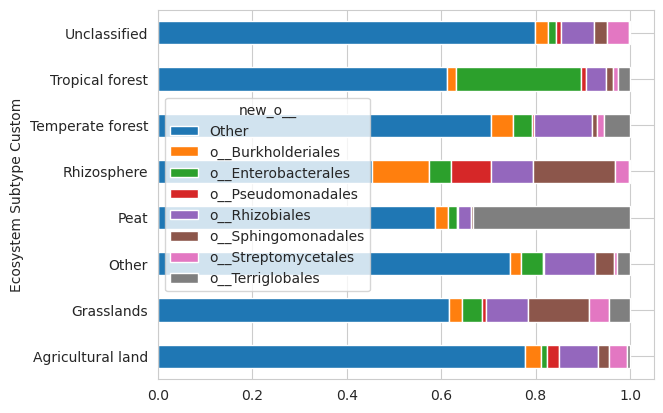

In [17]:
test_h_g = (
    test_h.groupby("Ecosystem Subtype Custom")["new_o__"]
    .value_counts()
    .unstack(fill_value=0)
)
test_h_g = test_h_g.div(test_h_g.sum(axis=1), axis=0)

test_h_g.plot(kind="barh", stacked=True)

In [18]:
def get_ptu_dbcan_per_env_optimized(df, ptus):
    dbcan_mapping = {}

    # Convert 'ptus' to a set for faster membership checking
    ptus_set = set(ptus)

    for env in df["Ecosystem Subtype Custom"].unique():
        # Select the rows for the current environment only once
        dbcan_data = df[df["Ecosystem Subtype Custom"] == env]
        # Convert PTUs in the current environment to a set
        env_ptus = set(dbcan_data["PTU"])

        # Use set operations to determine presence of each PTU
        dbcan_mapping[env] = {ptu: int(ptu in env_ptus) for ptu in ptus_set}

    return dbcan_mapping


dbcan_mapping = get_ptu_dbcan_per_env_optimized(df, df["PTU"].dropna().unique())

In [19]:
dbcan_mapping

{'Rhizosphere': {'PTU-06777': 0,
  'PTU-28887': 0,
  'PTU-44851': 1,
  'PTU-08862': 0,
  'PTU-06654': 1,
  'PTU-42376': 1,
  'PTU-52625': 0,
  'PTU-00192': 1,
  'PTU-06237': 1,
  'PTU-46784': 0,
  'PTU-37431': 0,
  'PTU-00410': 1,
  'PTU-28744': 0,
  'PTU-35303': 0,
  'PTU-43454': 0,
  'PTU-12187': 0,
  'PTU-33296': 0,
  'PTU-13270': 0,
  'PTU-08048': 0,
  'PTU-13258': 1,
  'PTU-14415': 1,
  'PTU-05080': 0,
  'PTU-12650': 0,
  'PTU-44673': 0,
  'PTU-51917': 0,
  'PTU-06181': 1,
  'PTU-21597': 1,
  'PTU-32237': 0,
  'PTU-21670': 1,
  'PTU-05493': 0,
  'PTU-44639': 0,
  'PTU-19345': 0,
  'PTU-15589': 0,
  'PTU-00518': 1,
  'PTU-49867': 1,
  'PTU-04367': 0,
  'PTU-56483': 1,
  'PTU-49481': 0,
  'PTU-30989': 1,
  'PTU-21230': 0,
  'PTU-37937': 0,
  'PTU-48645': 1,
  'PTU-07923': 0,
  'PTU-44151': 0,
  'PTU-19360': 0,
  'PTU-11239': 1,
  'PTU-03500': 1,
  'PTU-44130': 0,
  'PTU-30229': 1,
  'PTU-20436': 0,
  'PTU-31388': 0,
  'PTU-27240': 0,
  'PTU-06010': 1,
  'PTU-07763': 0,
  'PTU-36484'

Text(0.5, 1.0, 'Which ecosystems have proportionately more PTUs with Cazymes?')

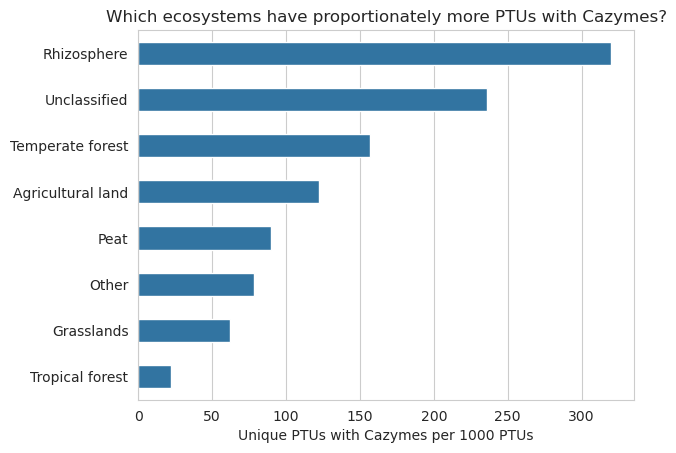

In [20]:
a = df.groupby("Ecosystem Subtype Custom")["PTU"].nunique().to_dict()
prop = {
    key: value / len(dbcan_mapping.get(key).values()) * 1000 for key, value in a.items()
}
fig, ax = plt.subplots()
sns.barplot(
    dict(sorted(prop.items(), key=lambda item: item[1], reverse=True)),
    orient="h",
    width=0.5,
)
ax.set_xlabel("Unique PTUs with Cazymes per 1000 PTUs")
ax.set_title("Which ecosystems have proportionately more PTUs with Cazymes?")

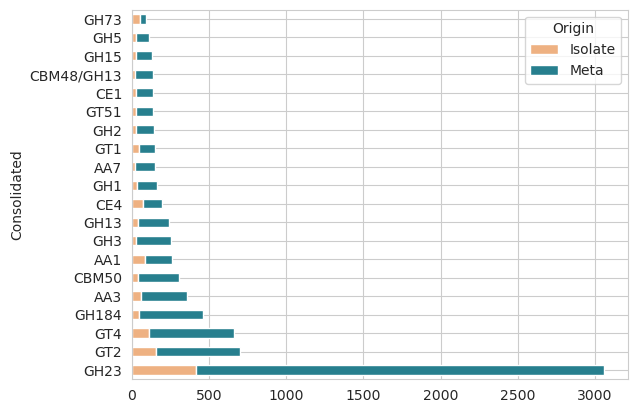

In [21]:
c = (
    df.drop_duplicates(subset=["PTU", "Origin", "Consolidated"])
    .groupby("Consolidated")["Origin"]
    .value_counts()
    .unstack()
    .fillna(0)
)
c["Total"] = c.sum(axis=1)

c.sort_values(by="Total", ascending=False).head(20).drop("Total", axis=1).plot(
    kind="barh", stacked=True, color=["#EEB182", "#277F8E"]
)
plt.savefig("../figures/cazyme_count_ptu.pdf", bbox_inches="tight")

In [22]:
df.drop_duplicates(subset=["Plasmid", "order", "Consolidated"]).groupby("order")[
    "Ecosystem Subtype Custom"
].value_counts()

order               Ecosystem Subtype Custom
o__                 Rhizosphere                 21
                    Agricultural land           14
                    Other                        6
                    Grasslands                   5
                    Tropical forest              3
                                                ..
o__Xanthomonadales  Other                       14
                    Temperate forest            13
                    Agricultural land            8
                    Tropical forest              2
                    Peat                         2
Name: count, Length: 354, dtype: int64

In [23]:
# a = (
#     df[(df["complete"]) & (~df["Plasmid"].str.contains("IMGPR|Refsoil|PLSDB"))]
#     .groupby("Ecosystem Subtype Custom")["PTU"]
#     .nunique()
#     .to_dict()
# )
# prop = {
#     key: (value / len(dbcan_mapping.get(key).values())) * 1000
#     for key, value in a.items()
# }

# fig, ax = plt.subplots()
# sns.barplot(
#     dict(sorted(prop.items(), key=lambda item: item[1], reverse=True)),
#     orient="h",
#     ax=ax,
# )
# ax.set_xlabel("Unique PTUs with Cazymes per 1000 plasmids")
# ax.set_title(
#     "Which ecosystems have proportionately more PTUs with Cazymes? Only metaGs and complete"
# )

In [24]:
# a = df[~df["complete"]].groupby("Ecosystem Subtype Custom")["PTU"].nunique().to_dict()
# prop = {
#     key: value / len(dbcan_mapping.get(key).values()) * 1000 for key, value in a.items()
# }
# sns.barplot(
#     dict(sorted(prop.items(), key=lambda item: item[1], reverse=True)),
#     orient="h",
# ).set_title(
#     "Which ecosystems have more unique PTUs with Cazymes? Only counting non complete plasmids"
# )

In [25]:
df.groupby("Ecosystem Subtype Custom")["PTU"].nunique()

Ecosystem Subtype Custom
Agricultural land     881
Grasslands            450
Other                 564
Peat                  646
Rhizosphere          2306
Temperate forest     1132
Tropical forest       160
Unclassified         1702
Name: PTU, dtype: int64

In [26]:
df.head()

,Gene ID,EC#,HMMER,dbCAN_sub,DIAMOND,#ofTools,Plasmid,taxon_oid,Ecosystem Subtype,Ecosystem Subtype Custom,...,method,domain,phylum,class,order,family,genus,species,complete,Consolidated
1,2162886007|SwRhRL2b_contig_1567849_80,-,PL17_1(378-509),PL17_e0,PL17_1,3,2162886007|SwRhRL2b_contig_1567849,2162886007,Rhizosphere,Rhizosphere,...,iphop-blast,d__Bacteria,p__Pseudomonadota,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Klebsiella,s__Klebsiella quasipneumoniae,False,PL17
1,2162886007|SwRhRL2b_contig_1567849_80,-,PL17_1(378-509),PL17_e0,PL17_1,3,2162886007|SwRhRL2b_contig_1567849,2162886007,Rhizosphere,Rhizosphere,...,iphop-blast,d__Bacteria,p__Pseudomonadota,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Enterobacter,s__Enterobacter vonholyi,False,PL17
1,2162886007|SwRhRL2b_contig_1567849_80,-,PL17_1(378-509),PL17_e0,PL17_1,3,2162886007|SwRhRL2b_contig_1567849,2162886007,Rhizosphere,Rhizosphere,...,iphop-blast,d__Bacteria,p__Pseudomonadota,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Klebsiella,s__Klebsiella aerogenes,False,PL17
1,2162886007|SwRhRL2b_contig_1567849_80,-,PL17_1(378-509),PL17_e0,PL17_1,3,2162886007|SwRhRL2b_contig_1567849,2162886007,Rhizosphere,Rhizosphere,...,iphop-blast,d__Bacteria,p__Pseudomonadota,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Enterobacter,s__Enterobacter roggenkampii,False,PL17
1,2162886007|SwRhRL2b_contig_1567849_80,-,PL17_1(378-509),PL17_e0,PL17_1,3,2162886007|SwRhRL2b_contig_1567849,2162886007,Rhizosphere,Rhizosphere,...,iphop-blast,d__Bacteria,p__Pseudomonadota,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Klebsiella,NaN,False,PL17


In [27]:
df.drop_duplicates(subset=["Plasmid", "Consolidated"])

,Gene ID,EC#,HMMER,dbCAN_sub,DIAMOND,#ofTools,Plasmid,taxon_oid,Ecosystem Subtype,Ecosystem Subtype Custom,...,method,domain,phylum,class,order,family,genus,species,complete,Consolidated
1,2162886007|SwRhRL2b_contig_1567849_80,-,PL17_1(378-509),PL17_e0,PL17_1,3,2162886007|SwRhRL2b_contig_1567849,2162886007,Rhizosphere,Rhizosphere,...,iphop-blast,d__Bacteria,p__Pseudomonadota,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Klebsiella,s__Klebsiella quasipneumoniae,False,PL17
2,2162886007|SwRhRL2b_contig_2777551_6,3.2.1.20:1,GH13_23(29-376),GH13_e140,GH13_23,3,2162886007|SwRhRL2b_contig_2777551,2162886007,Rhizosphere,Rhizosphere,...,iphop-blast,d__Bacteria,p__Pseudomonadota,c__Gammaproteobacteria,o__Xanthomonadales,f__Xanthomonadaceae,g__Xanthomonas_A,s__Xanthomonas_A indica,False,GH13
3,2162886007|SwRhRL2b_contig_988462_11,-,GH23(68-171),GH23_e697,GH23,3,2162886007|SwRhRL2b_contig_988462,2162886007,Rhizosphere,Rhizosphere,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,GH23
4,2162886008|PRSSGFe2_Sequence0000004305_6,-,GH184(66-202),-,GH184,2,2162886008|PRSSGFe2_Sequence0000004305,2162886008,Tropical forest,Tropical forest,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,GH184
5,2162886015|FOassembled-_contig00007_4,-,GT4(211-373),GT4_e966,GT4,3,2162886015|FOassembled-_contig00007,2162886015,Grasslands,Grasslands,...,iphop-blast,d__Bacteria,p__Pseudomonadota,c__Gammaproteobacteria,o__Xanthomonadales,f__Rhodanobacteraceae,g__Rhodanobacter,s__Rhodanobacter sp009766065,False,GT4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38907,Refsoil_NZ_CP008958.1_12,-,-,AA2_e1,AA0,2,Refsoil_NZ_CP008958.1,Refsoil_NZ_CP008958.1,Unclassified,Unclassified,...,isolate,d__Bacteria,p__Pseudomonadota,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Escherichia,s__Escherichia coli,True,AA0/AA2
38908,Refsoil_NZ_CP011450.1_232,-,-,GT4_e3610,GT4,2,Refsoil_NZ_CP011450.1,Refsoil_NZ_CP011450.1,Unclassified,Unclassified,...,isolate,d__Bacteria,p__Pseudomonadota,c__Alphaproteobacteria,o__Sphingomonadales,f__Sphingomonadaceae,g__Sphingomonas_D,s__Sphingomonas_D sanxanigenens,True,GT4
38910,Refsoil_NZ_CP012899.1_15,-,-,GH23_e977,GH23,2,Refsoil_NZ_CP012899.1,Refsoil_NZ_CP012899.1,Unclassified,Unclassified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,GH23
38914,Refsoil_NZ_HG916855.1_130,-,-,GT1_e452,GT1,2,Refsoil_NZ_HG916855.1,Refsoil_NZ_HG916855.1,Unclassified,Unclassified,...,isolate,d__Bacteria,p__Pseudomonadota,c__Alphaproteobacteria,o__Rhizobiales,f__Rhizobiaceae,g__Rhizobium,s__Rhizobium favelukesii,True,GT1


In [30]:
from scipy import stats

# n_meta_plasmids_with_cazy = 90200
# n_isolate_plasmids = 8081

test = (
    df.drop_duplicates(subset=["Plasmid", "Consolidated"])
    .groupby(["Consolidated", "Origin"])
    .agg("Plasmid")
    .nunique()
    .to_frame()
    .reset_index()
    .pivot(index="Consolidated", columns="Origin", values="Plasmid")
    .fillna(0)
)
test["Meta_no"] = (
    df[df["Origin"] == "Meta"]
    .drop_duplicates(subset=["Plasmid", "Consolidated"])
    .shape[0]
    - test["Meta"]
)
test["Isolate_no"] = (
    df[df["Origin"] == "Isolate"]
    .drop_duplicates(subset=["Plasmid", "Consolidated"])
    .shape[0]
    - test["Isolate"]
)
test

Origin,Isolate,Meta,Meta_no,Isolate_no
Consolidated,,,,
AA0/AA2,86.0,36.0,14533.0,11678.0
AA1,291.0,250.0,14319.0,11473.0
AA10,64.0,14.0,14555.0,11700.0
AA12,13.0,17.0,14552.0,11751.0
AA3,445.0,463.0,14106.0,11319.0
...,...,...,...,...
PL7,4.0,9.0,14560.0,11760.0
PL7/GH184,0.0,1.0,14568.0,11764.0
PL8,11.0,0.0,14569.0,11753.0


In [31]:
def calc_odds_ratio(element_type):
    meta_with_element = int(test.loc[element_type, "Meta"])
    isolate_with_element = int(test.loc[element_type, "Isolate"])
    meta_without_element = int(test.loc[element_type, "Meta_no"])
    isolate_without_element = int(test.loc[element_type, "Isolate_no"])

    # without pseudo counts for fisher exact
    table_fisher = np.array(
        [
            [meta_with_element, isolate_with_element],
            [
                meta_without_element,
                isolate_without_element,
            ],
        ]
    )

    fisher_exact_p = stats.fisher_exact(table_fisher).pvalue
    res = stats.contingency.odds_ratio(table_fisher + 1)

    return (
        float(table_fisher[0][0]),
        float(table_fisher[0][1]),
        np.log(res.statistic),
        fisher_exact_p,
    )

In [32]:
results = {}
for i in set(test.index):
    results[i] = calc_odds_ratio(i)

results

{'GT30': (1.0, 1.0, -0.21384378112958752, 1.0),
 'GH71': (2.0, 0.0, 0.8848837388945565, 0.505654518108001),
 'CBM13/GH93': (11.0, 3.0, 0.8852466801678937, 0.10660094954146378),
 'GT5': (58.0, 41.0, 0.1265251889107963, 0.5444815933393039),
 'CBM48/GH13/CBM20': (0.0, 1.0, -0.9070339917189278, 0.44673983214977403),
 'GH85/GH0': (0.0, 1.0, -0.9070339917189278, 0.44673983214977403),
 'GT25/GH16': (33.0, 6.0, 1.3683296693752136, 0.00014827707054619024),
 'CE4/GH18': (5.0, 9.0, -0.7250558638269617, 0.18013301800625306),
 'GT4/GT17': (1.0, 1.0, -0.21384378112958752, 1.0),
 'CE15': (3.0, 3.0, -0.21387651733154134, 1.0),
 'GH180/GH39': (7.0, 0.0, 1.8660349131623535, 0.019404941118742823),
 'CBM48/GH51': (2.0, 0.0, 0.8848837388945565, 0.505654518108001),
 'GH43/CBM42': (1.0, 0.0, 0.47936279427384054, 1.0),
 'PL11': (8.0, 3.0, 0.5973674432572506, 0.3651844086857047),
 'CE5': (28.0, 158.0, -1.9269790015707333, 5.713357373791792e-30),
 'CBM37/GH30': (0.0, 1.0, -0.9070339917189278, 0.4467398321497740

In [33]:
results_df = pd.DataFrame(results).T
results_df.columns = ["Meta", "Isolate", "log_odds", "p"]
results_df

,Meta,Isolate,log_odds,p
GT30,1.0,1.0,-0.213844,1.000000
GH71,2.0,0.0,0.884884,0.505655
CBM13/GH93,11.0,3.0,0.885247,0.106601
GT5,58.0,41.0,0.126525,0.544482
CBM48/GH13/CBM20,0.0,1.0,-0.907034,0.446740
...,...,...,...,...
CBM13/GH43,8.0,6.0,0.037517,1.000000
CBM4/GH9,0.0,1.0,-0.907034,0.446740
GH183,2.0,6.0,-1.061467,0.150862
CBM35/GH26,1.0,0.0,0.479363,1.000000


In [45]:
results_df_final = results_df[results_df["Meta"] + results_df["Isolate"] >= 100]
results_df_final["padj"] = stats.false_discovery_control(results_df_final["p"])
results_df_final = results_df_final[results_df_final["padj"] < 0.05]
results_df_final.head()

/tmp/ipykernel_2823471/2949155825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df_final["padj"] = stats.false_discovery_control(results_df_final["p"])


,Meta,Isolate,log_odds,p,padj
CE5,28.0,158.0,-1.926979,5.713357e-30,1.371206e-28
GT51,161.0,178.0,-0.317747,4.184803e-03,7.173948e-03
GH20,33.0,68.0,-0.925076,4.863707e-06,1.296989e-05
GT4,718.0,667.0,-0.148086,7.678471e-03,1.244326e-02
GH19,92.0,41.0,0.583917,1.177153e-03,2.456667e-03


In [46]:
top_cazy = pd.concat(
    [
        results_df_final.sort_values(
            by=["log_odds", "padj"], ascending=[False, True]
        ).head(10),
        results_df_final.sort_values(
            by=["log_odds", "padj"], ascending=[False, True]
        ).tail(10),
    ]
)
top_cazy

,Meta,Isolate,log_odds,p,padj
GH130,104.0,28.0,1.077574,2.885743e-08,9.893977e-08
GH23,4829.0,1775.0,1.025686,1.236630e-256,5.935825e-255
CBM50,444.0,149.0,0.891775,2.653635e-23,2.547490e-22
GH184,667.0,253.0,0.778212,1.477778e-27,1.773334e-26
GH19,92.0,41.0,0.583917,1.177153e-03,2.456667e-03
GH43,100.0,47.0,0.532949,1.995145e-03,3.683344e-03
AA7,167.0,103.0,0.268462,3.126410e-02,4.547506e-02
GH3,301.0,190.0,0.248903,7.814312e-03,1.244326e-02
GT4,718.0,667.0,-0.148086,7.678471e-03,1.244326e-02
AA3,463.0,445.0,-0.180528,8.036272e-03,1.244326e-02


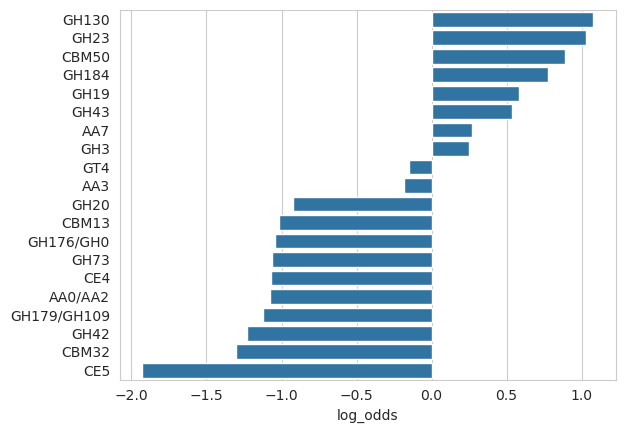

In [47]:
sns.barplot(top_cazy["log_odds"], orient="h")
plt.savefig("../figures/cazyme_log_odds.pdf", bbox_inches="tight")

In [ ]:
df[df["Plasmid"].isin(planctomycetota_plasmids)].groupby("Consolidated")[
    "PTU"
].nunique()

Consolidated
CE20        1
GH106       2
GH2         1
GH23        1
GH28        1
GT2         4
GT26        1
GT4         1
GT83        1
PL12/PL0    1
Name: PTU, dtype: int64

CE20 -> Carbohydrate esterase activity on xyloglucan

GH106 -> α-L-rhamnosidase, exo-acting targeting linkages present in pectin polysaccharides